In [35]:
import pandas as pd
from sklearn import preprocessing
import psycopg2

In [36]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "telecom4"

In [37]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    df = pd.read_sql_query(sql, conn)

C:\Users\xinle\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [38]:
df.head()

,churn,agehh1,agehh2,rvowner,handsets,prizmcode,activesubs,customerid,occupation,truckowner,...,totalrecurringcharge,directorassistedcalls,madecalltoretentionteam,retentionoffersaccepted,adjustmentstocreditrating,referralsmadebysubscriber,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_telecom4_hashid
0,Yes,62,0,No,2,Suburban,1,3000002,Professional,No,...,22,0.25,Yes,0,0,0,924c647b-5c0f-465f-85ac-ac6c5ed7b0b7,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.861582+00:00,65242bf1d0062823def51862b25403f7
1,Yes,40,42,No,2,Suburban,1,3000010,Professional,No,...,17,0,No,0,0,0,3f04984d-1a89-4442-bf2c-c371e98a45d4,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.861582+00:00,2df6200412f54fb26b004413cb9e8eb7
2,No,26,26,No,1,Town,1,3000014,Crafts,No,...,38,0,No,0,0,0,ed89717a-83b8-41e3-a5af-8f26061a4c04,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.861582+00:00,d2b5af599f841ff4c52470fc5017348a
3,No,30,0,No,9,Other,2,3000022,Other,No,...,75,1.24,No,0,0,0,3d3ca7a6-d6b2-4937-97e3-ebbd1e7bda86,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.861582+00:00,0ccd990504a476016a7e64f934532984
4,Yes,46,54,No,4,Other,2,3000026,Professional,No,...,17,0,No,0,1,0,2e6763ca-494d-4f30-95aa-1d6c71ffdde8,2023-01-24 10:08:55.358000+00:00,2023-01-24 10:11:05.861582+00:00,6e74a8836695443a08d6d87801efad29


In [39]:
# drop irrelevant data
df.drop(list(df.filter(regex = '_airbyte_')), axis = 1, inplace = True)
df.head()

,churn,agehh1,agehh2,rvowner,handsets,prizmcode,activesubs,customerid,occupation,truckowner,...,droppedblockedcalls,notnewcellphoneuser,currentequipmentdays,respondstomailoffers,totalrecurringcharge,directorassistedcalls,madecalltoretentionteam,retentionoffersaccepted,adjustmentstocreditrating,referralsmadebysubscriber
0,Yes,62,0,No,2,Suburban,1,3000002,Professional,No,...,1.3,No,361,Yes,22,0.25,Yes,0,0,0
1,Yes,40,42,No,2,Suburban,1,3000010,Professional,No,...,0.3,No,1504,Yes,17,0,No,0,0,0
2,No,26,26,No,1,Town,1,3000014,Crafts,No,...,0.0,No,1812,No,38,0,No,0,0,0
3,No,30,0,No,9,Other,2,3000022,Other,No,...,59.7,No,458,Yes,75,1.24,No,0,0,0
4,Yes,46,54,No,4,Other,2,3000026,Professional,No,...,0.0,Yes,852,Yes,17,0,No,0,1,0


In [40]:
df.isnull().sum()

churn                         0
agehh1                        0
agehh2                        0
rvowner                       0
handsets                      0
prizmcode                     0
activesubs                    0
customerid                    0
occupation                    0
truckowner                    0
uniquesubs                    0
incomegroup                   0
nonustravel                   0
servicearea                  24
blockedcalls                  0
childreninhh                  0
creditrating                  0
droppedcalls                  0
handsetprice                  0
inboundcalls                  0
ownscomputer                  0
roamingcalls                  0
handsetmodels                 0
hascreditcard                 0
homeownership                 0
maritalstatus                 0
outboundcalls                 0
receivedcalls                 0
threewaycalls                 0
monthlyminutes                0
monthlyrevenue                0
optoutma

In [41]:
df_cat = df.select_dtypes(['object']).copy()
df_cat = df_cat.drop(columns = ['rvowner','truckowner','creditrating','ownsmotorcycle','currentequipmentdays',
                               'nonustravel','homeownership','handsetmodels','hascreditcard',
                               'handsets','buysviamailorder','handsetwebcapable','optoutmailings',
                               'handsetrefurbished','ownscomputer','handsetprice','newcellphoneuser'])
df_cat.columns

Index(['churn', 'agehh1', 'agehh2', 'prizmcode', 'occupation', 'servicearea',
       'childreninhh', 'roamingcalls', 'maritalstatus', 'monthlyminutes',
       'monthlyrevenue', 'overageminutes', 'percchangeminutes',
       'percchangerevenues', 'notnewcellphoneuser', 'respondstomailoffers',
       'totalrecurringcharge', 'directorassistedcalls',
       'madecalltoretentionteam'],
      dtype='object')

In [42]:
# as of now fill all NaNs w/ 0
df['servicearea'].fillna(df['servicearea'].mode()[0], inplace=True)
df = df.drop(columns = ['rvowner','truckowner','creditrating','ownsmotorcycle','customerid',
                       'nonustravel','homeownership','currentequipmentdays','handsetmodels','hascreditcard',
                        'handsets','buysviamailorder','handsetwebcapable','optoutmailings',
                       'handsetrefurbished','ownscomputer','handsetprice','newcellphoneuser'])

In [43]:
mappings={'Yes':1,'No':2}
df['churn']=df['churn'].map(mappings)

In [45]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
columns = ['agehh1', 'agehh2', 'prizmcode', 'occupation', 'servicearea',
       'childreninhh', 'roamingcalls', 'maritalstatus', 'monthlyminutes',
       'monthlyrevenue', 'overageminutes',
       'percchangeminutes', 'percchangerevenues', 'notnewcellphoneuser',
       'respondstomailoffers', 'totalrecurringcharge', 'directorassistedcalls',
       'madecalltoretentionteam']
# Encode labels in column 'species'.
for i in columns:
    df[i]= label_encoder.fit_transform(df[i])

In [46]:
df.head()

,churn,agehh1,agehh2,prizmcode,activesubs,occupation,uniquesubs,incomegroup,servicearea,blockedcalls,...,callforwardingcalls,droppedblockedcalls,notnewcellphoneuser,respondstomailoffers,totalrecurringcharge,directorassistedcalls,madecalltoretentionteam,retentionoffersaccepted,adjustmentstocreditrating,referralsmadebysubscriber
0,1,23,0,2,1,4,2,4,658,0.7,...,0.0,1.3,0,1,113,1,1,0,0,0
1,1,12,13,2,1,4,1,5,610,0.0,...,0.0,0.3,0,1,82,0,0,0,0,0
2,2,5,5,3,1,1,1,6,352,0.0,...,0.0,0.0,0,0,145,0,0,0,0,0
3,2,7,0,0,2,3,2,6,610,7.7,...,0.0,59.7,0,1,187,7,0,0,0,0
4,1,15,19,0,2,4,2,9,563,0.0,...,0.0,0.0,1,1,82,0,0,0,1,0


In [47]:
df.isnull().sum()

churn                        0
agehh1                       0
agehh2                       0
prizmcode                    0
activesubs                   0
occupation                   0
uniquesubs                   0
incomegroup                  0
servicearea                  0
blockedcalls                 0
childreninhh                 0
droppedcalls                 0
inboundcalls                 0
roamingcalls                 0
maritalstatus                0
outboundcalls                0
receivedcalls                0
threewaycalls                0
monthlyminutes               0
monthlyrevenue               0
overageminutes               0
peakcallsinout               0
retentioncalls               0
monthsinservice              0
unansweredcalls              0
callwaitingcalls             0
customercarecalls            0
offpeakcallsinout            0
percchangeminutes            0
percchangerevenues           0
callforwardingcalls          0
droppedblockedcalls          0
notnewce

In [48]:
# modelling

In [49]:
from sklearn.model_selection import train_test_split
xtra,xtes,ytra,ytes = train_test_split(df.drop("churn", axis = 1),df["churn"], test_size = 0.3,
                                      random_state = 404)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state = 402)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [51]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtra,ytra)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=402),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [52]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [54]:
rfm = RandomForestClassifier(criterion = "gini", max_depth = 8,
                             max_features = "auto", n_estimators = 30,
                             random_state = 402)

rfm.fit(xtra,ytra)

RandomForestClassifier(max_depth=8, n_estimators=30, random_state=402)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_preds = rfm.predict(xtra)
y_test_preds = rfm.predict(xtes)

In [56]:
print(classification_report(ytes, y_test_preds))

              precision    recall  f1-score   support

           1       0.64      0.03      0.06      4500
           2       0.71      0.99      0.83     10815

    accuracy                           0.71     15315
   macro avg       0.67      0.51      0.44     15315
weighted avg       0.69      0.71      0.60     15315



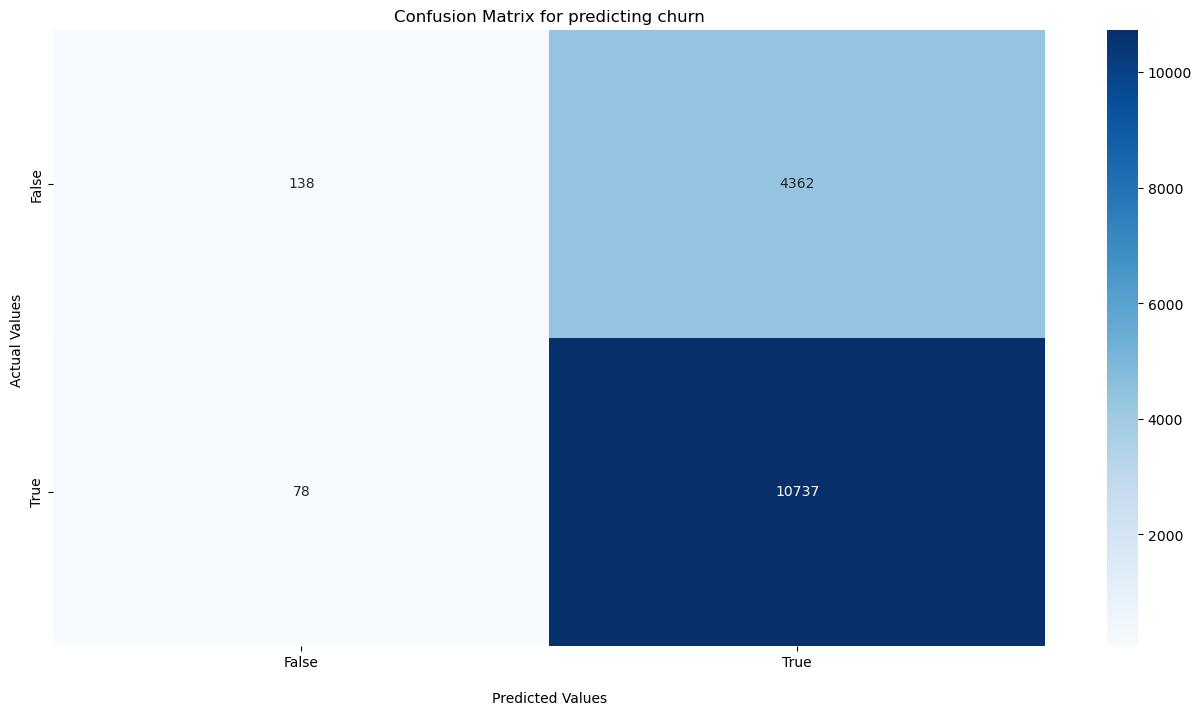

In [57]:
cf_matrix = confusion_matrix(ytes, y_test_preds)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()